# Double DQN Learning

One of the most popular value-based RL agent is the Double DQN Learning, made famous by its recent success in beating Atari games. Here, I've developed a similar model to take on the financial market. For more in-depth explanation of DQN, this site is a good place to start as Jaromiru made it easier to digest: https://jaromiru.com/2016/10/03/lets-make-a-dqn-implementation/. 



To begin, we create the custom OpenAI gym environment

In [1]:
import gym
import gym_trading
env = gym.make('trading-v0')

instrument = "GBPUSD"
accountID=""
access_token=""
additional_pairs = []
input_planets_data = {}
env.initialise_simulator(instrument, additional_pairs, accountID, access_token, input_planets_data, time_frame="1440",
                         oanda=False, size_of_history=4500, ATR=True, SMA=True, RSI=True, BB=False,
                         trade_period=1, train_split=0.6, dummy_period=None)

[2017-08-27 18:36:49,670] Making new env: trading-v0
C:\Users\Henry\Anaconda2\envs\tensorflow\lib\site-packages\matplotlib\cbook.py:136: MatplotlibDeprecationWarning: The finance module has been deprecated in mpl 2.0 and will be removed in mpl 2.2. Please use the module mpl_finance instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


Please invoke .initialise_simulator() method next to complete initialization


# Creating the Learning Agent

In [2]:
from gym_trading.envs.Q_learning import Q_Network

Parameters:
* env: The OpenAI gym environment
* hidden_layers: list, each element in the list represents the number of neurons per layer 
    Default: [256, 128, 64, 32]

    states -> 256 -> 128 -> 64 -> 32 -> Q values


* train_episodes: integer
* update_frequency: Update target network with online network every t steps Default:500 (see below)




Naive Q network tends to result in instability - oscillation and divergence of reward function. DQN prevents/ minimizes this problem through:

1. Use of Experience Replay: Store every experience <s, a, r, s'> in memory, then perform random sampling of batch to train the network off-policy . This breaks up correlation between adjacent data.

2. Use of Separate Network (aka Target Network): Generate Target Q-values to compute loss function of every action during training. Update this network every t steps (update_frequency)

Fret not, these are taken care of behind the scene. 

Make sure to install both Tensorflow and Baselines
   

In [3]:
Q_learning = Q_Network(env, hidden_layers=[256, 128, 64, 32], train_episodes=1500, update_frequency=500)

# Training Phase

Call train_model method to start training network

Params:
- batch_size: number of experiences to be randomly chosen from memory for training

- episodes_to_explore: Number of episodes to be used for random actions (Select this carefully to ensure sufficient exploration)

- convergence_threshold: Average reward(pips) over the last 50 episodes to be exceeded for the network to reach convergence. Otherwise, training only terminates by the end of 1500 episodes.

As you can see, in the first 100 episodes, the agent randomly picks action (Exploration). Exploration percentage stalls at 2% and the agent selectively picks action that maximises reward (Exploitation).

Episode with the highest reward collected will be saved and reused for testing. 

In [4]:
Q_learning.train_model(batch_size=50, convergence_threshold = 2000, episodes_to_explore=80)

End of Episode 1, Total Reward is -4807.2, Average Reward is -5.696
Percentage of time spent on exploring (Random Action): 98 %
{0: 406, 1: 438, 2: 396}



C:\Users\Henry\Anaconda2\envs\tensorflow\lib\site-packages\numpy\core\fromnumeric.py:2889: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\Henry\Anaconda2\envs\tensorflow\lib\site-packages\numpy\core\_methods.py:80: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


End of Episode 2, Total Reward is -345.1, Average Reward is -0.407
Percentage of time spent on exploring (Random Action): 97 %
{0: 427, 1: 420, 2: 393}

End of Episode 3, Total Reward is -2514.5, Average Reward is -3.074
Percentage of time spent on exploring (Random Action): 96 %
{0: 384, 1: 434, 2: 422}

End of Episode 4, Total Reward is -3830.3, Average Reward is -4.565
Percentage of time spent on exploring (Random Action): 95 %
{0: 404, 1: 435, 2: 401}

End of Episode 5, Total Reward is -6578.9, Average Reward is -8.004
Percentage of time spent on exploring (Random Action): 94 %
{0: 402, 1: 420, 2: 418}

End of Episode 6, Total Reward is -2763.8, Average Reward is -3.275
Percentage of time spent on exploring (Random Action): 93 %
{0: 444, 1: 400, 2: 396}

End of Episode 7, Total Reward is -3950.6, Average Reward is -4.599
Percentage of time spent on exploring (Random Action): 91 %
{0: 437, 1: 422, 2: 381}

End of Episode 8, Total Reward is 770.6, Average Reward is 0.990
Percentage o

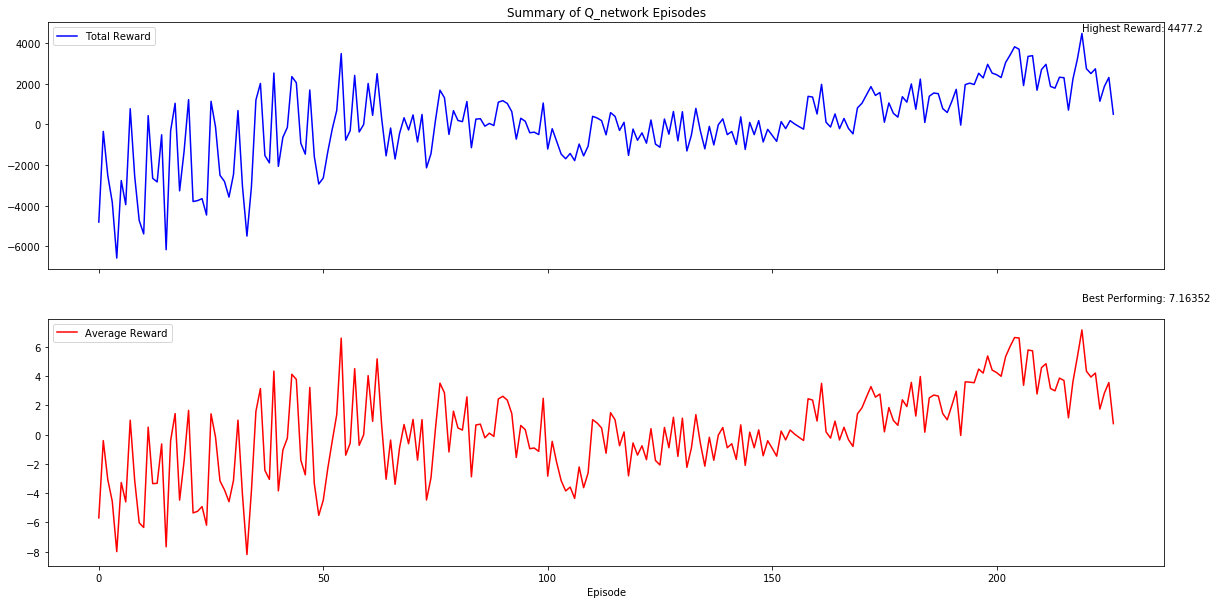

Episode with highest Reward: 220
Episode with highest Average reward per trade: 220
Episode with the most optimal policy (average reward * total reward): 219


In [5]:
Q_learning._overall_summary()

At the peak of exploration (episode 1), you can see that the agent is buying and selling in a highly random fashion.

SUMMARY OF EPISODE 1 

Total Trades Taken: 844
406 Buys, 438 Sells
Total Reward: -4807.2
Reward: -2399.4999999999745 pips(Buy), -2407.6999999999643 pips(Sell) 

Average Reward: -5.69573459716
Win Ratio: 47.1563981043 % 



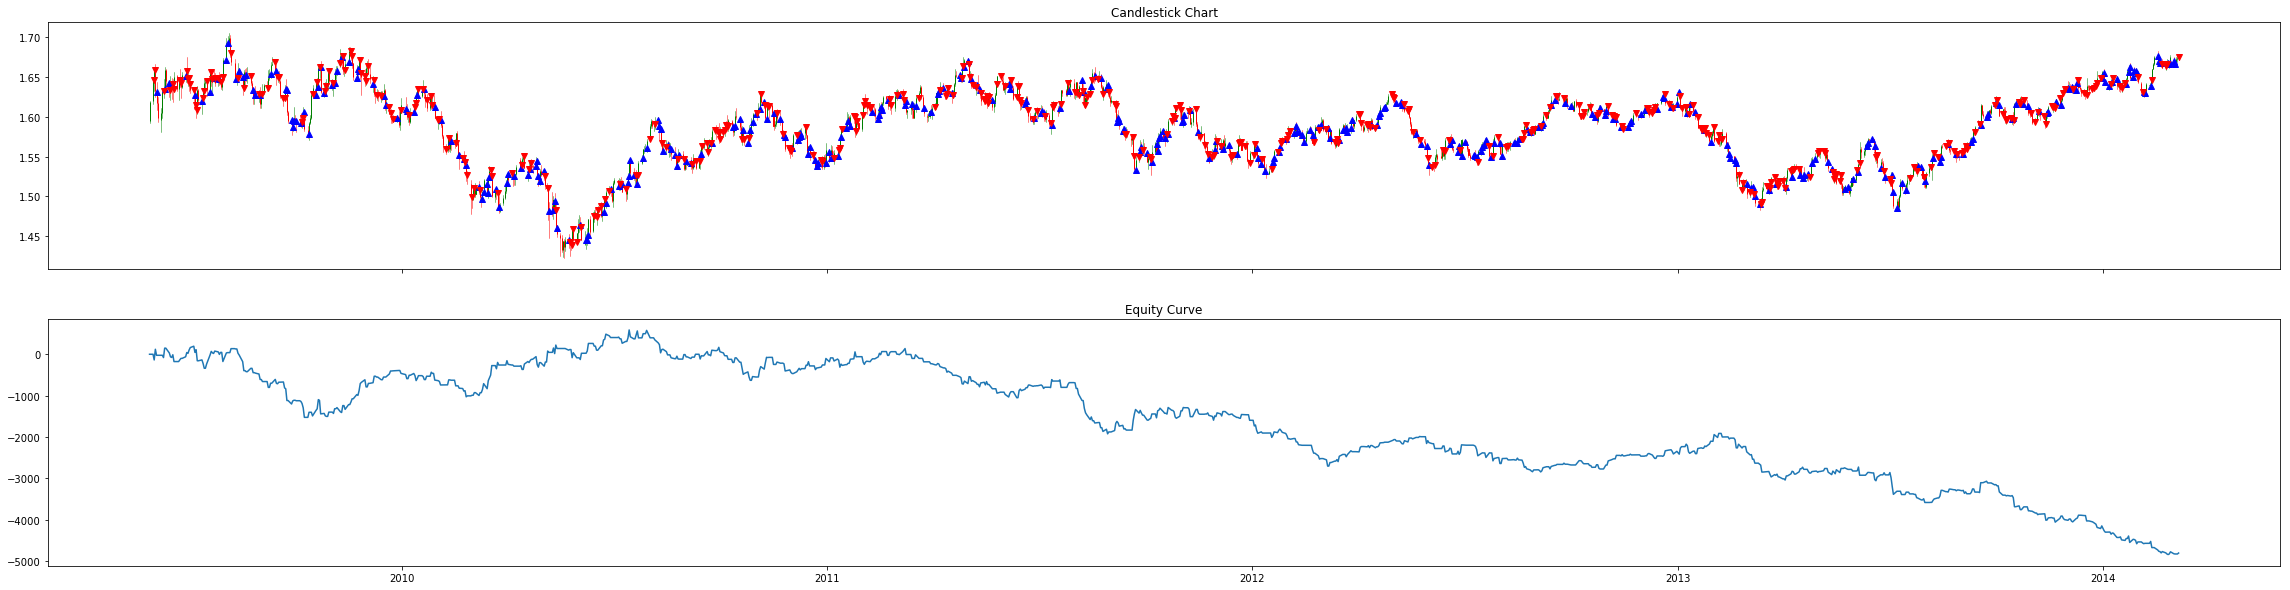

     Entry Price Entry Time  Exit Price  Exit Time  Profit  Trade Duration  \
0        1.64433 2009-06-02     1.65778 2009-06-02  -137.5               1   
1        1.65775 2009-06-03     1.63160 2009-06-03   258.5               1   
2        1.63161 2009-06-04     1.61733 2009-06-04  -145.8               1   
3        1.63052 2009-06-10     1.63576 2009-06-10   -55.4               1   
4        1.63575 2009-06-11     1.65887 2009-06-11   228.2               1   
5        1.64345 2009-06-15     1.63202 2009-06-15  -117.3               1   
6        1.63203 2009-06-16     1.64108 2009-06-16   -93.5               1   
7        1.64099 2009-06-17     1.63990 2009-06-17   -13.9               1   
8        1.63988 2009-06-18     1.63311 2009-06-18    64.7               1   
9        1.63309 2009-06-19     1.64924 2009-06-19  -164.5               1   
10       1.64509 2009-06-24     1.64063 2009-06-24    41.6               1   
11       1.64064 2009-06-25     1.63678 2009-06-25    35.6      

In [7]:
Q_learning.episode_review(1)

Eventually, the agent gets smarter and starts buying/selling wherever there's edge. More buys (blue arrows) in uptrend, and it learns to stay out when there's no edge.

SUMMARY OF EPISODE 220 

Total Trades Taken: 625
523 Buys, 102 Sells
Total Reward: 4477.2
Reward: 2331.200000000003 pips(Buy), 2145.9999999999977 pips(Sell) 

Average Reward: 7.16352
Win Ratio: 52.96 % 



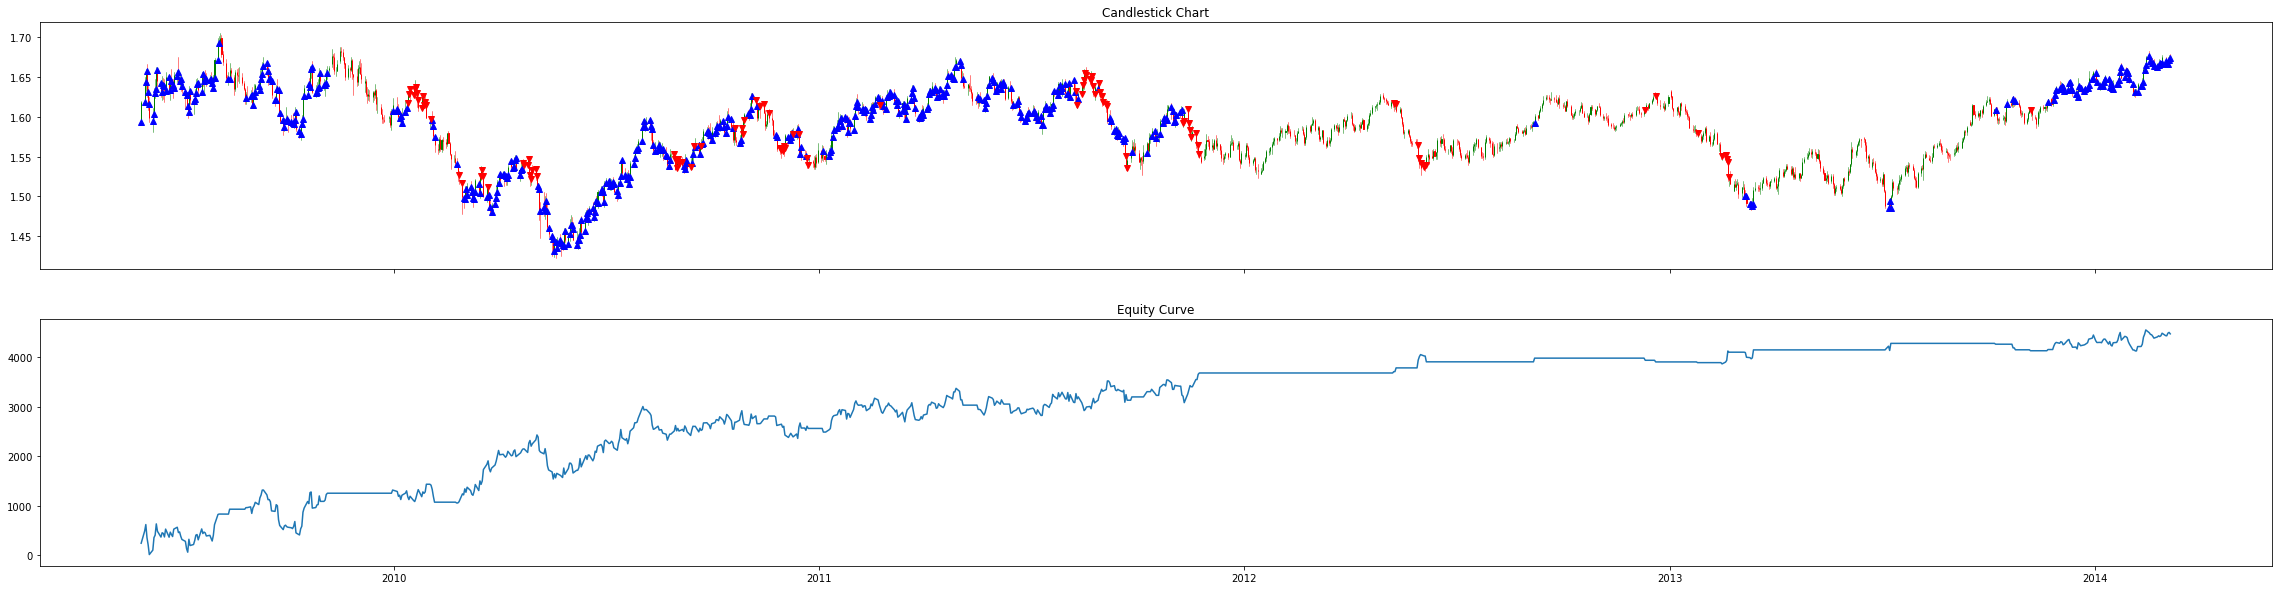

     Entry Price Entry Time  Exit Price  Exit Time  Profit  Trade Duration  \
0        1.59427 2009-05-29     1.61869 2009-05-29   241.2               1   
1        1.61935 2009-06-01     1.64428 2009-06-01   246.3               1   
2        1.64433 2009-06-02     1.65778 2009-06-02   131.5               1   
3        1.65775 2009-06-03     1.63160 2009-06-03  -264.5               1   
4        1.63161 2009-06-04     1.61733 2009-06-04  -145.8               1   
5        1.61735 2009-06-05     1.59800 2009-06-05  -196.5               1   
6        1.59565 2009-06-08     1.60490 2009-06-08    89.5               1   
7        1.60486 2009-06-09     1.63051 2009-06-09   253.5               1   
8        1.63052 2009-06-10     1.63576 2009-06-10    49.4               1   
9        1.63575 2009-06-11     1.65887 2009-06-11   228.2               1   
10       1.65885 2009-06-12     1.64421 2009-06-12  -149.4               1   
11       1.64345 2009-06-15     1.63202 2009-06-15  -117.3      

In [9]:
Q_learning.episode_review(220)

# Testing (Out-of sample data)

So how does this agent perform in a new environment?


In [4]:
Q_learning.test_model()

INFO:tensorflow:Restoring parameters from ./saved_tensor_models/dqn.ckpt


[2017-08-27 18:38:17,848] Restoring parameters from ./saved_tensor_models/dqn.ckpt


End of Testing, Total Reward is -195.8, Average Reward is -0.383170254403


SUMMARY OF EPISODE 1 

Total Trades Taken: 511
467 Buys, 44 Sells
Total Reward: -195.8
Reward: -118.90000000001109 pips(Buy), -76.90000000001204 pips(Sell) 

Average Reward: -0.383170254403
Win Ratio: 49.3150684932 % 



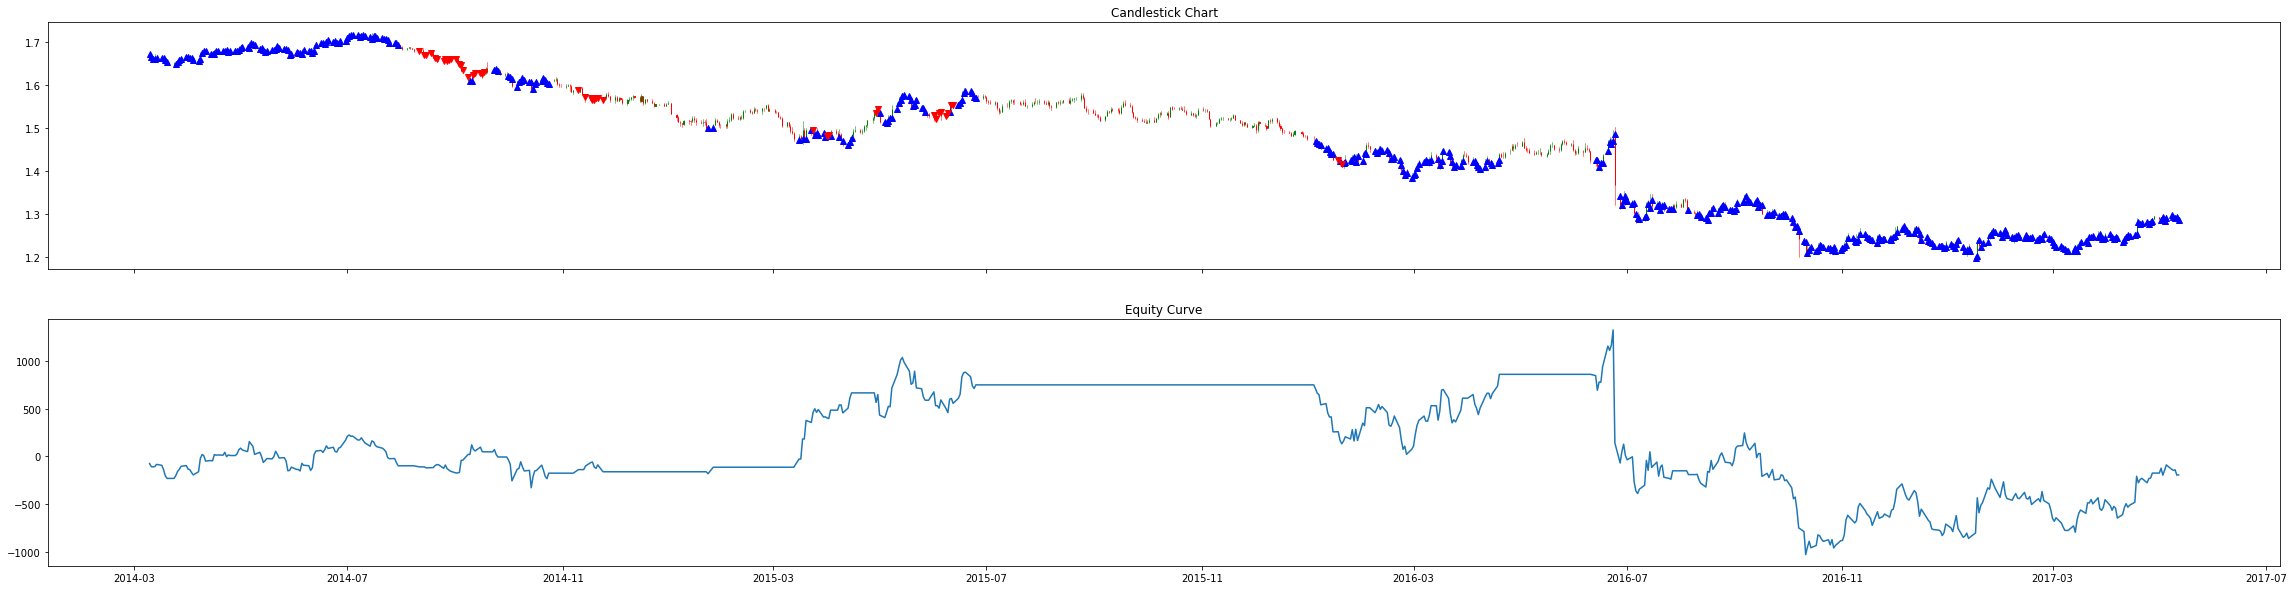

     Entry Price Entry Time  Exit Price  Exit Time  Profit  Trade Duration  \
0        1.67181 2014-03-10     1.66449 2014-03-10   -76.2               1   
1        1.66445 2014-03-11     1.66146 2014-03-11   -32.9               1   
2        1.66150 2014-03-12     1.66163 2014-03-12    -1.7               1   
3        1.66165 2014-03-13     1.66220 2014-03-13     2.5               1   
4        1.66222 2014-03-14     1.66483 2014-03-14    23.1               1   
5        1.66405 2014-03-17     1.66338 2014-03-17    -9.7               1   
6        1.66337 2014-03-18     1.65911 2014-03-18   -45.6               1   
7        1.65921 2014-03-19     1.65300 2014-03-19   -65.1               1   
8        1.65297 2014-03-20     1.65058 2014-03-20   -26.9               1   
9        1.64957 2014-03-25     1.65285 2014-03-25    29.8               1   
10       1.65300 2014-03-26     1.65759 2014-03-26    42.9               1   
11       1.65768 2014-03-27     1.66025 2014-03-27    22.7      

In [5]:
Q_learning.episode_review(1)

Not very well.. Can be further improved on more runs

# Thank You
Do feedback